In [149]:
# Digital Assets Portfolio Optimization
# Prepared by Nicolas on 11/09/2024

# Executive Summary
# The following script outlines the methodology and results of constructing a digital assets portfolio with
# optimized allocation while managing risk through advanced statistical measures.
# The selection of the assets was done after carefully by taking into consideration key metrics such as 
# active addresses, revenue generated, net deposits, code commits, tokenomics and liquidity (trading volume)

# Portfolio Composition
# The portfolio will consist of the following assets:
# - Avalanche (AVAX)
# - Ethereum (ETH)
# - Solana (SOL)
# - Aave (AAVE)
# - Chainlink (LINK)
# - Shiba Inu (SHIB)
# - Binance (BNB)
# - Arweave (AR)
# - Trader Joe (JOE)


# Methodology
# Return and Risk Assessment
# - Returns Calculation: We will compute the historical returns of each asset.
# - Volatility Measurement: The standard deviation of returns will be calculated to assess the volatility and risk associated with each asset.
# - Correlation Analysis: We will examine the correlations between the assets to understand their interdependencies.

# Sharpe Ratio Calculation
# The Sharpe Ratio will be utilized to evaluate the risk-adjusted return of the portfolio.
# A higher Sharpe Ratio indicates a more attractive risk-adjusted return.

# Portfolio Simulation
# We will conduct a simulation with 121,393 different portfolio allocation combinations.
# The objective is to identify the allocation that maximizes the Sharpe Ratio.

# Conclusion
# The optimal portfolio allocation will be selected based on the highest Sharpe Ratio,
# providing a balanced approach to maximizing returns while minimizing risk.


In [122]:
# importing libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt
import yfinance as yf

In [123]:
def get_risk_free_rate():
    # Fetch the 10-year US Treasury bond yield
    treasury_data = yf.download("^TNX", period="1d")
    risk_free_rate = treasury_data['Close'].iloc[-1] / 100  # Convert percentage to decimal
    return risk_free_rate

risk_free_rate = get_risk_free_rate()
print(risk_free_rate)

[*********************100%***********************]  1 of 1 completed
0.03645999908447266


In [124]:
# creating a dataframe
my_portfolio = pd.DataFrame()

In [150]:


# List of tickers
tickers = ['AVAX-USD', 'ETH-USD', 'SOL-USD', 'AAVE-USD', 'LINK-USD', 'SHIB-USD', 'AR-USD', 'JOE-USD']
start_date = '2021-08-27'
end_date = '2024-09-10'

# Fetching data using yfinance
my_portfolio = yf.download(tickers, start=start_date, end=end_date)

print(my_portfolio['Close'].tail(10))

[*********************100%***********************]  9 of 9 completed
              AAVE-USD     AR-USD   AVAX-USD     BNB-USD      ETH-USD  \
Date                                                                    
2024-08-31  129.798508  21.642437  22.797575  532.896973  2513.393799   
2024-09-01  120.688271  20.805590  21.448174  512.595215  2427.902344   
2024-09-02  134.903152  21.696596  22.368862  526.438721  2538.187256   
2024-09-03  118.789230  20.556829  21.383656  518.668945  2420.603760   
2024-09-04  135.270782  21.281630  21.899666  507.820496  2448.977051   
2024-09-05  128.969833  21.029043  21.366562  502.069366  2367.737549   
2024-09-06  126.912682  19.991568  21.147371  486.902740  2223.876465   
2024-09-07  125.191544  19.517508  21.797344  493.226135  2274.107178   
2024-09-08  125.689568  20.153728  23.215967  503.000153  2297.292969   
2024-09-09  140.237152  20.795952  23.859669  518.545349  2358.482178   

             JOE-USD   LINK-USD  SHIB-USD     SOL-USD 

In [151]:
# calculating the mean daily return
my_portfolio['Close'].pct_change(1).mean()

AAVE-USD    0.000513
AR-USD      0.002030
AVAX-USD    0.000969
BNB-USD     0.000619
ETH-USD     0.000427
JOE-USD     0.001291
LINK-USD    0.000325
SHIB-USD    0.002904
SOL-USD     0.002078
dtype: float64

In [152]:
# checking correlations
my_portfolio['Close'].pct_change(1).corr()

,AAVE-USD,AR-USD,AVAX-USD,BNB-USD,ETH-USD,JOE-USD,LINK-USD,SHIB-USD,SOL-USD
AAVE-USD,1.000000,0.539415,0.628348,0.643821,0.747366,0.482900,0.684374,0.393129,0.616972
AR-USD,0.539415,1.000000,0.530086,0.525637,0.588207,0.347482,0.540582,0.280292,0.588823
AVAX-USD,0.628348,0.530086,1.000000,0.633475,0.681886,0.748416,0.657880,0.349072,0.692587
BNB-USD,0.643821,0.525637,0.633475,1.000000,0.749105,0.492612,0.659558,0.362638,0.620586
ETH-USD,0.747366,0.588207,0.681886,0.749105,1.000000,0.522747,0.739016,0.412464,0.703384
JOE-USD,0.482900,0.347482,0.748416,0.492612,0.522747,1.000000,0.504995,0.247281,0.492593
LINK-USD,0.684374,0.540582,0.657880,0.659558,0.739016,0.504995,1.000000,0.373387,0.647502
SHIB-USD,0.393129,0.280292,0.349072,0.362638,0.412464,0.247281,0.373387,1.000000,0.334545
SOL-USD,0.616972,0.588823,0.692587,0.620586,0.703384,0.492593,0.647502,0.334545,1.000000


In [153]:
# we will now use log returns
log_return = np.log(my_portfolio['Close']/my_portfolio['Close'].shift(1))
log_return

,AAVE-USD,AR-USD,AVAX-USD,BNB-USD,ETH-USD,JOE-USD,LINK-USD,SHIB-USD,SOL-USD
Date,,,,,,,,,
2021-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-27,0.058722,0.398882,0.189796,0.031831,0.053467,NaN,0.063139,0.000000,0.156629
2021-08-28,-0.015032,0.209306,0.002380,-0.016931,-0.008042,-0.104446,-0.011178,0.000000,0.093321
2021-08-29,-0.007041,-0.105081,-0.055037,-0.012238,-0.005378,0.256755,0.003282,0.000000,-0.023367
2021-08-30,-0.019360,0.278371,-0.139452,-0.044257,-0.000815,-0.767254,-0.032791,0.000000,0.157142
...,...,...,...,...,...,...,...,...,...
2024-09-05,-0.047700,-0.011940,-0.024644,-0.011390,-0.033736,-0.027378,-0.031369,-0.074108,-0.032520
2024-09-06,-0.016079,-0.050594,-0.010312,-0.030674,-0.062683,-0.013643,-0.045023,0.000000,-0.034125
2024-09-07,-0.013654,-0.023999,0.030273,0.012903,0.022336,0.024317,0.045288,0.000000,0.021618


In [154]:
# calculating yearly co-variance of log returns
log_return.cov()*365

,AAVE-USD,AR-USD,AVAX-USD,BNB-USD,ETH-USD,JOE-USD,LINK-USD,SHIB-USD,SOL-USD
AAVE-USD,0.979723,0.709277,0.668750,0.414858,0.528669,0.747191,0.619502,0.549361,0.673607
AR-USD,0.709277,1.594904,0.727086,0.441088,0.541038,0.677518,0.641046,0.513003,0.818812
AVAX-USD,0.668750,0.727086,1.073420,0.427310,0.503160,1.164586,0.625910,0.517656,0.777879
BNB-USD,0.414858,0.441088,0.427310,0.402121,0.337238,0.486113,0.380540,0.323827,0.430069
ETH-USD,0.528669,0.541038,0.503160,0.337238,0.492933,0.557185,0.468907,0.403125,0.534425
JOE-USD,0.747191,0.677518,1.164586,0.486113,0.557185,2.218876,0.697863,0.537836,0.797466
LINK-USD,0.619502,0.641046,0.625910,0.380540,0.468907,0.697863,0.793731,0.472172,0.630262
SHIB-USD,0.549361,0.513003,0.517656,0.323827,0.403125,0.537836,0.472172,1.601718,0.506112
SOL-USD,0.673607,0.818812,0.777879,0.430069,0.534425,0.797466,0.630262,0.506112,1.142953


In [155]:
# Let's now put in some allocation weights and run 121,393 different possible combinations of this portfolio

# setting seed
np.random.seed(101)

num_of_simulations = 121393
all_weights = np.zeros((num_of_simulations, len(tickers)))
returns_arr = np.zeros(num_of_simulations)
volatility_arr = np.zeros(num_of_simulations)
sharpe_arr = np.zeros(num_of_simulations)


# creating a loop to run 121,393 different allocation combinations 
for index in range(num_of_simulations):
    
    # weights
    weights = np.array(np.random.random(9))
    weights = weights/np.sum(weights)
    
    # save the weights
    all_weights[index, :] = weights

    # calculating yearly expected portfolio return
    returns_arr[index] = np.sum(log_return.mean()*weights *365)

    # calculating yearly expected volatility
    volatility_arr[index] = np.sqrt(np.dot(weights.T, np.dot (log_return.cov()*365, weights)))

    # Sharpe Ratio
    sharpe_arr[index] = (returns_arr[index] - risk_free_rate) / volatility_arr[index]

In [156]:
# finding the max return
sharpe_arr.max()

0.06826539603115703

In [157]:
# finding the location of that max sharpe
sharpe_arr.argmax()

83915

In [158]:
# using the index location to check the optimal allocations 
all_weights[83915, :]

array([0.00637262, 0.13360369, 0.09757588, 0.10870295, 0.00045222,
       0.00545508, 0.0193362 , 0.25634169, 0.37215967])

In [159]:
max_return = returns_arr[83915]
max_volatility = volatility_arr[83915]

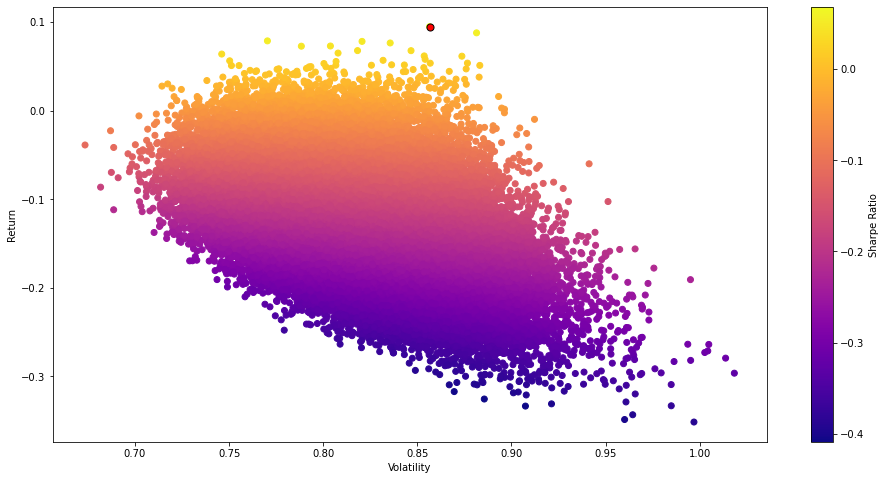

In [160]:
plt.figure(figsize=(16, 8));
plt.scatter(volatility_arr, returns_arr, c=sharpe_arr, cmap='plasma');
plt.colorbar(label = 'Sharpe Ratio');
plt.xlabel('Volatility');
plt.ylabel('Return');

# grabbing the max sharpe ratio (will plot as a red dot)
plt.scatter(max_volatility, max_return, c='red', s=50, edgecolors='black');

In [161]:
# Conclusion:
# The allocation combination with the highest sharpe ratio:

# - Avalanche (AVAX) 6.37262%
# - Ethereum (ETH) 13.360369%
# - Solana (SOL) 9.757588%
# - Aave (AAVE) 10.870295%
# - Chainlink (LINK) 4.5222%
# - Shiba Inu (SHIB) 5.45508%
# - Binance (BNB) 1.93362%
# - Arweave (AR) 25.634169%
# - Trader Joe (JOE) 37.215967%


# Although at the end of the day allocation will always depend on the risk tolerance of each individual,
# the above allocation is considered the most optimal for achieving the highest return at the
# lowest possible risk